In [27]:
import numpy as np
import pandas as pd
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
cf.go_offline()

In [24]:
trains = pd.read_csv('../train.csv')

In [4]:
trains.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
trains.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Review which columns with high proportions of missing values in order to drop them eventually

In [59]:
# trains.isnull().sum()


In [26]:
# trains.columns

# Drop Unnecessary Columns

In [25]:
trains = trains.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1) 
trains.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Review Data Types

In [60]:
# trains.dtypes

# Convert categorical data to numerical

# Let's study the sales per year, depending on the results, we will study the data to try to prove if there is a factor that is causing a difference in the average results

In [35]:
trains.pivot_table(
    index = ['YrSold'],
    values = 'SalePrice',
    aggfunc = 'sum'
).iplot(kind = 'bar')


# Let's study if there is a significant difference in our STDV and MEAN by year

In [38]:
print(trains.groupby('YrSold')['SalePrice'].mean())

print(trains.groupby('YrSold')['SalePrice'].std())
# print(trains.groupby('Legendary')['YrSold'].std())


YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64
YrSold
2006    79426.838855
2007    85768.171410
2008    69735.610685
2009    80879.237311
2010    80451.280085
Name: SalePrice, dtype: float64


# By Building Type, and SalePrice, let's see what Building Type is dominant

In [40]:
types = trains.pivot_table(
                index=["BldgType"], 
                values=["SalePrice"], 
                aggfunc={"BldgType":len}
            )

types['BldgType'].nlargest(5)

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

# There is a significant difference between 1Fam Building Type and the rest of the properties. Let's study and graphic the results of the mean and the std between 1Fam and the rest

Text(0, 0.5, 'Standard')

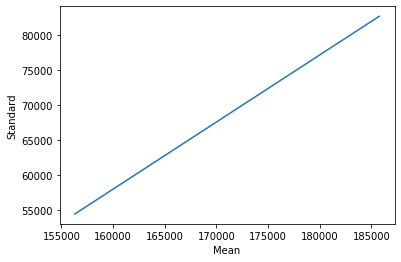

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt



one_fam = trains.query("BldgType == '1Fam'")['SalePrice'].mean() 

non_one_fam = trains.query("BldgType != '1Fam'")['SalePrice'].mean()

one_fam_std = trains.query("BldgType == '1Fam'")['SalePrice'].std() 

non_one_fam_std = trains.query("BldgType != '1Fam'")['SalePrice'].std()



mean = [one_fam, non_one_fam]

standard = [one_fam_std, non_one_fam_std]

plt.plot(mean, standard)
plt.xlabel('Mean')
plt.ylabel('Standard')



In [54]:
from scipy.stats import ttest_ind

non_one_fam = trains.query("BldgType != '1Fam'")['SalePrice']
one_fam = trains.query("BldgType == '1Fam'")['SalePrice']

ttest_ind(
    one_fam,
    non_one_fam,
    equal_var = True
)[1]

# Our P-Value is significant small. 


1.3363539314549095e-07

In [55]:
trains.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

# Let's see which qualities in the purchased property are most common in the highest paid sales.

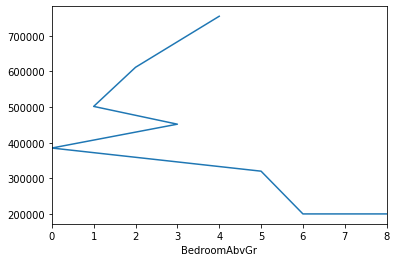

In [64]:
 df =    trains.pivot_table(
        index=['BedroomAbvGr'],
        values=['SalePrice'],
        aggfunc={"SalePrice":max}
                )


# types = trains.pivot_table(
#                 index=["BldgType"], 
#                 values=["SalePrice"], 
#                 aggfunc={"BldgType":len}
#             )

df['SalePrice'].nlargest(10).plot(kind = 'line')

# Is there a significant difference between the mean of overall condition and the mean of overall quality? 

In [58]:
   
from scipy.stats import ttest_rel

quality = trains['OverallQual']
quantity = trains['OverallCond']

p_val = ttest_rel(quality, quantity)[1]

p_val

#the result is too small, meaning there is no significant difference in between both columns

3.1418893382107847e-26